# 1(a.)

In [11]:
import pandas as pd
dataset = pd.read_csv('/Users/divyatmika/Desktop/Di/wdbc.csv')

In [16]:
print("No of rows:")
print(dataset.shape[0])
print("No of columns:")
print(dataset.shape[1])

No of rows:
569
No of columns:
32


# Dividing into test and train set

In [17]:
# 20 percent from positive and from negative class in test dataset

In [25]:
mali_data = dataset.loc[dataset['Diag'] == 'M']

In [26]:
mali_data.shape

(212, 32)

In [33]:
#first 20 % of 212 = 42 rows 
mail_data_test = mali_data[:42]
mail_data_train = mali_data[42:]

In [34]:
benign_data = dataset.loc[dataset['Diag'] == 'B']
benign_data.shape

(357, 32)

In [35]:
benign_data_test = benign_data[:71]
benign_data_train = benign_data[71:]

In [36]:
train = benign_data_train.append(mail_data_train)
test = benign_data_test.append(mail_data_test)

In [38]:
train.shape

(456, 32)

In [40]:
test.shape

(113, 32)

# b(i.) Supervised Learning: Train an L1-penalized SVM 

In [41]:
malign_dataset = dataset.loc[dataset['Diag'] == 'M']
benign_dataset = dataset.loc[dataset['Diag'] == 'B']

In [43]:
from sklearn.model_selection import train_test_split
train_malign, test_malign = train_test_split(malign_dataset, test_size=0.2,random_state=42)
train_benign, test_benign = train_test_split(benign_dataset, test_size=0.2,random_state=42)

In [44]:
train_dataset = train_malign.append(train_benign)
test_dataset = test_malign.append(test_benign)

In [73]:
from sklearn import preprocessing
X_train = train_dataset.drop(columns=['Diag'])
Y_train = train_dataset[['Diag']]
X_test = test_dataset.drop(columns=['Diag'])
Y_test = test_dataset[['Diag']]

In [89]:
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

In [74]:
import warnings
warnings.filterwarnings('ignore')
Y_train['Diag'][Y_train.Diag == 'M'] = 0 
Y_train['Diag'][Y_train.Diag == 'B'] = 1 
Y_test['Diag'][Y_test.Diag == 'M'] = 0 
Y_test['Diag'][Y_test.Diag == 'B'] = 1 

In [62]:
import numpy as np
param_grid = {'SVC__C':np.arange(0.01,100,10)}

In [63]:
param_grid

{'SVC__C': array([  1.00000000e-02,   1.00100000e+01,   2.00100000e+01,
          3.00100000e+01,   4.00100000e+01,   5.00100000e+01,
          6.00100000e+01,   7.00100000e+01,   8.00100000e+01,
          9.00100000e+01])}

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('SVC',LinearSVC(penalty='l1',loss='squared_hinge', dual=False))])
linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)

In [68]:
linearSVC

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVC', LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'SVC__C': array([  1.00000e-02,   1.00100e+01,   2.00100e+01,   3.00100e+01,
         4.00100e+01,   5.00100e+01,   6.00100e+01,   7.00100e+01,
         8.00100e+01,   9.00100e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [79]:
ytrain=Y_train.astype('int')

In [81]:
linearSVC.fit(normalized_X_train,ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVC', LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'SVC__C': array([  1.00000e-02,   1.00100e+01,   2.00100e+01,   3.00100e+01,
         4.00100e+01,   5.00100e+01,   6.00100e+01,   7.00100e+01,
         8.00100e+01,   9.00100e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [90]:
y_pred = linearSVC.predict(normalized_X_test)

In [97]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
ytest = Y_test.astype('int')
fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred, pos_label=2)
print(roc_auc_score(ytest, y_pred))
print(accuracy_score(y_pred,ytest))
print(recall_score(ytest, y_pred, average=None))
print(f1_score(ytest,y_pred))

nan
0.886143410853
0.904347826087
[ 0.81395349  0.95833333]
0.926174496644


In [88]:
normalized_X_test.shape

(454, 31)

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from random import randint
accuracy_score_train = []
f1_score_train = []
recall_score_train = []
precision_score_train = []
auc_score_train = []
accuracy_score_test = []
f1_score_test = []
recall_score_test = []
precision_score_test = []
auc_score_test = []
for i in range(1,31,1):
    random_val = randint(0, 42)
    #Generate train and test sets 
    train_malign, test_malign = train_test_split(malign_dataset, test_size=0.2,random_state=random_val)
    train_benign, test_benign = train_test_split(benign_dataset, test_size=0.2,random_state=random_val)
    train_dataset = train_malign.append(train_benign)
    test_dataset = test_malign.append(test_benign)
    #xtrain and ytrain 
    X_train = train_dataset.drop(columns=['Diag'])
    Y_train = train_dataset[['Diag']]
    X_test = test_dataset.drop(columns=['Diag'])
    Y_test = test_dataset[['Diag']]
    #normalised. the dataset 
    normalized_X_train = preprocessing.normalize(X_train)
    normalized_X_test = preprocessing.normalize(X_test)
    Y_train['Diag'][Y_train.Diag == 'M'] = 0 
    Y_train['Diag'][Y_train.Diag == 'B'] = 1 
    Y_test['Diag'][Y_test.Diag == 'M'] = 0 
    Y_test['Diag'][Y_test.Diag == 'B'] = 1 
    #param grids
    param_grid = {'SVC__C':np.arange(0.01,100,10)}
    SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('SVC',LinearSVC(penalty='l1',loss='squared_hinge', dual=False))])
    #Grid search 
    linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)
    ytrain=Y_train.astype('int')
    linearSVC.fit(normalized_X_train,ytrain)
    #predict for test and train 
    y_pred_test = linearSVC.predict(normalized_X_test)
    y_pred_train = linearSVC.predict(normalized_X_train)
    ytest = Y_test.astype('int')
    fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred, pos_label=2)
    #AUC Score for test and train 
    auc_score_train.append(roc_auc_score(ytrain, y_pred_train))
    auc_score_test.append(roc_auc_score(ytest, y_pred_test))
    #Accuracy score 
    accuracy_score_train.append(accuracy_score(ytrain,y_pred_train))
    accuracy_score_test.append(accuracy_score(ytest,y_pred_test))
    #recall score 
    recall_score_train.append(recall_score(ytrain, y_pred_train, average=None))
    recall_score_test.append(recall_score(ytest, y_pred_test, average=None))
    #f1 score 
    f1_score_train.append(f1_score(ytrain,y_pred_train))
    f1_score_test.append(f1_score(ytest,y_pred_test))
    #Precision score 
    precision_score_train.append(precision_score(ytrain,y_pred_train))
    precision_score_test.append(precision_score(ytest,y_pred_test))
    

# Precision score for train and test dataset 

In [130]:
print("Precision score for train")
print(precision_score_train)
print("Precision score for test")
print(precision_score_test)

Precision score for train
[0.87654320987654322, 0.88714733542319746, 0.87925696594427249, 0.88198757763975155, 0.89589905362776023, 0.88161993769470404, 0.87037037037037035, 0.88198757763975155, 0.87925696594427249, 0.87076923076923074, 0.87037037037037035, 0.89873417721518989, 0.89028213166144199, 0.88714733542319746, 0.88714733542319746, 0.89341692789968652, 0.89589905362776023, 0.88749999999999996, 0.88749999999999996, 0.88473520249221183, 0.88749999999999996, 0.87345679012345678, 0.88198757763975155, 0.88473520249221183, 0.89028213166144199, 0.88235294117647056, 0.87925696594427249, 0.8788819875776398, 0.87925696594427249, 0.89308176100628933]
Precision score for test
[0.86585365853658536, 0.87804878048780488, 0.89873417721518989, 0.88888888888888884, 0.84705882352941175, 0.88749999999999996, 0.91025641025641024, 0.88749999999999996, 0.86585365853658536, 0.97222222222222221, 0.91025641025641024, 0.84705882352941175, 0.84705882352941175, 0.89610389610389607, 0.88607594936708856, 0.8

In [3]:
print("Average Precision score train : ")
print(sum(precision_score_train) / float(len(precision_score_train)))

Average Precision score train : 
0.8839454360869572


In [5]:
print("Average Precision score test : ")
print(sum(precision_score_test) / float(len(precision_score_test)))

Average Precision score test : 
0.880118856547534


# F1 Score : 

In [131]:
print("F1 score for train")
print(f1_score_train)
print("F1 score for test")
print(f1_score_test)

F1 score for train
[0.93267651888341541, 0.9370860927152318, 0.93421052631578949, 0.93574958813838549, 0.94352159468438535, 0.93399339933993397, 0.92610837438423654, 0.93574958813838549, 0.93421052631578949, 0.9278688524590164, 0.92610837438423654, 0.94509151414309489, 0.9403973509933774, 0.9370860927152318, 0.9370860927152318, 0.94370860927152311, 0.94352159468438535, 0.93884297520661153, 0.93884297520661153, 0.9372937293729372, 0.93884297520661153, 0.92939244663382581, 0.93574958813838549, 0.9372937293729372, 0.9403973509933774, 0.9375, 0.93421052631578949, 0.93245469522240521, 0.93421052631578949, 0.94195688225538976]
F1 score for test
[0.92207792207792216, 0.93506493506493515, 0.94039735099337751, 0.94117647058823528, 0.91719745222929927, 0.93421052631578949, 0.94666666666666666, 0.93421052631578949, 0.92207792207792216, 0.97222222222222221, 0.94666666666666666, 0.91719745222929927, 0.91719745222929927, 0.92617449664429519, 0.92715231788079466, 0.92307692307692302, 0.92307692307692

In [7]:
print("Average f1 score train : ")
print(sum(f1_score_train) / float(len(f1_score_train)))

Average f1 score train : 
0.9363721030174107


In [9]:
print("Average f1 score train : ")
print(sum(f1_score_test) / float(len(f1_score_test)))

Average f1 score train : 
0.9315114494388745


# AUC Score : 

In [132]:
print("AUC score for train")
print(auc_score_train)
print("AUC score for test")
print(auc_score_test)

AUC score for train
[0.87990241876881548, 0.88998235233053047, 0.8828609986504723, 0.88581957853212911, 0.9006124779404131, 0.88406519256721683, 0.87047648707567737, 0.88581957853212911, 0.8828609986504723, 0.87223087304058966, 0.87047648707567737, 0.90357105782206992, 0.89469531817709957, 0.88998235233053047, 0.88998235233053047, 0.89940828402366857, 0.9006124779404131, 0.89173673829544275, 0.89173673829544275, 0.88877815841378593, 0.89173673829544275, 0.87518945292224637, 0.88581957853212911, 0.88877815841378593, 0.89469531817709957, 0.8875739644970414, 0.8828609986504723, 0.88110661268556001, 0.8828609986504723, 0.89765389805875639]
AUC score for test
[0.86514857881136953, 0.88372093023255816, 0.90003229974160215, 0.89534883720930225, 0.84883720930232553, 0.88840439276485794, 0.91166020671834613, 0.88840439276485794, 0.86514857881136953, 0.96285529715762275, 0.91166020671834613, 0.84883720930232553, 0.84883720930232553, 0.88614341085271331, 0.88145994832041341, 0.86046511627906974, 

In [11]:
print("Average auc score train : ")
print(sum(auc_score_train) / float(len(auc_score_train)))

Average auc score train : 
0.8874628879892036


In [13]:
print("Average auc score test : ")
print(sum(auc_score_test) / float(len(auc_score_test)))

Average auc score test : 
0.8807978036175711


# Recall Score : 

In [133]:
print("Recall score for train")
print(recall_score_train)
print("Recall score for test")
print(recall_score_test)

Recall score for train
[array([ 0.76331361,  0.99649123]), array([ 0.78698225,  0.99298246]), array([ 0.76923077,  0.99649123]), array([ 0.77514793,  0.99649123]), array([ 0.80473373,  0.99649123]), array([ 0.77514793,  0.99298246]), array([ 0.75147929,  0.98947368]), array([ 0.77514793,  0.99649123]), array([ 0.76923077,  0.99649123]), array([ 0.75147929,  0.99298246]), array([ 0.75147929,  0.98947368]), array([ 0.81065089,  0.99649123]), array([ 0.79289941,  0.99649123]), array([ 0.78698225,  0.99298246]), array([ 0.78698225,  0.99298246]), array([ 0.79881657,  1.        ]), array([ 0.80473373,  0.99649123]), array([ 0.78698225,  0.99649123]), array([ 0.78698225,  0.99649123]), array([ 0.78106509,  0.99649123]), array([ 0.78698225,  0.99649123]), array([ 0.75739645,  0.99298246]), array([ 0.77514793,  0.99649123]), array([ 0.78106509,  0.99649123]), array([ 0.79289941,  0.99649123]), array([ 0.77514793,  1.        ]), array([ 0.76923077,  0.99649123]), array([ 0.76923077,  0.99298246

# Accuracy Score : 

In [134]:
print("Accurcay score for train")
print(accuracy_score_train)
print("Accuracy score for test")
print(accuracy_score_test)

Accurcay score for train
[0.9096916299559471, 0.91629955947136565, 0.91189427312775329, 0.91409691629955947, 0.92511013215859028, 0.91189427312775329, 0.90088105726872247, 0.91409691629955947, 0.91189427312775329, 0.90308370044052866, 0.90088105726872247, 0.92731277533039647, 0.92070484581497802, 0.91629955947136565, 0.91629955947136565, 0.92511013215859028, 0.92511013215859028, 0.91850220264317184, 0.91850220264317184, 0.91629955947136565, 0.91850220264317184, 0.90528634361233484, 0.91409691629955947, 0.91629955947136565, 0.92070484581497802, 0.91629955947136565, 0.91189427312775329, 0.9096916299559471, 0.91189427312775329, 0.9229074889867841]
Accuracy score for test
[0.89565217391304353, 0.91304347826086951, 0.92173913043478262, 0.92173913043478262, 0.88695652173913042, 0.91304347826086951, 0.93043478260869561, 0.91304347826086951, 0.89565217391304353, 0.9652173913043478, 0.93043478260869561, 0.88695652173913042, 0.88695652173913042, 0.90434782608695652, 0.90434782608695652, 0.895652

In [16]:
print("Average accuracy score train : ")
print(sum(accuracy_score_train) / float(len(accuracy_score_train))

Average accuracy score train : 
0.9150513950073422


In [18]:
print("Average accuracy score test : ")
print(sum(accuracy_score_test) / float(len(accuracy_score_test)))

Average accuracy score test : 
0.9084057971014493


In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred_test)

array([[31, 12],
       [ 2, 70]])

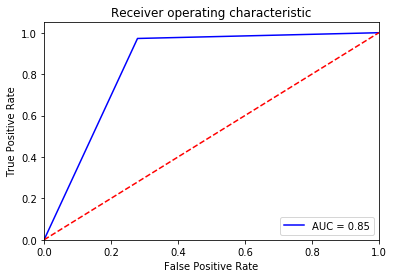

In [140]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# b(ii.) Semi-supervised / Self training 

In [142]:
#select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data.

In [279]:
train_malign, test_malign = train_test_split(malign_dataset, test_size=0.2,random_state=random_val)
train_benign, test_benign = train_test_split(benign_dataset, test_size=0.2,random_state=random_val)
train_dataset = train_malign.append(train_benign)
test_dataset = test_malign.append(test_benign)


In [280]:
train_dataset.shape

(454, 32)

In [281]:
#Split train dataset into labelled and unlabelled. 
train_dataset_label = train_dataset[:227]

In [282]:
train_dataset_unlabel = train_dataset[227:]

In [283]:
train_dataset_unlabel['Diag'] = ' ' #unlabelled dataset 

In [318]:
accuracy_score_test = []
f1_score_test = []
recall_score_test = []
precision_score_test = []
auc_score_test = []
accuracy_score_train = []
f1_score_train = []
recall_score_train = []
precision_score_train = []
auc_score_train = []
for i in range(1,31,1):
    random_val = randint(0, 42)
    train_malign, test_malign = train_test_split(malign_dataset, test_size=0.2,random_state=random_val)
    train_benign, test_benign = train_test_split(benign_dataset, test_size=0.2,random_state=random_val)
    train_dataset = train_malign.append(train_benign)
    test_dataset = test_malign.append(test_benign)
    #split train dataset into label and unlabelled :
    #select 50% of 1 and 0 both in labelled dataset M = 0 ; B = 1
    malign_dataset_label = train_dataset.loc[train_dataset['Diag'] == 'M']
    benign_dataset_label = train_dataset.loc[train_dataset['Diag'] == 'B']
    #split randomly 
    train_malign_label,train_malign_unlabel = train_test_split(malign_dataset_label, test_size=0.5,random_state=random_val)
    train_benign_label,train_benign_unlabel = train_test_split(benign_dataset_label, test_size=0.5,random_state=random_val)
    #concat
    train_dataset_label = train_malign_label.append(train_benign_label)
    train_dataset_unlabel = train_malign_unlabel.append(train_benign_unlabel)
    #unlabel the column 
    train_dataset_unlabel['Diag'] = ' '
    #prepare dataset for model
    train_dataset_label_X = train_dataset_label.drop(columns=['Diag'])
    train_dataset_label_Y = train_dataset_label[['Diag']]
    train_dataset_label_Y['Diag'][train_dataset_label_Y.Diag == 'M'] = 0 
    train_dataset_label_Y['Diag'][train_dataset_label_Y.Diag == 'B'] = 1 
    #preprocdessing unlabel dataset
    normalized_X_train_unlabel = preprocessing.normalize(train_dataset_unlabel.drop(columns=['Diag']))
    #prepare test dataset
    X_test = test_dataset.drop(columns=['Diag'])
    normalized_X_test = preprocessing.normalize(X_test)
    Y_test = test_dataset[['Diag']]
    Y_test['Diag'][Y_test.Diag == 'M'] = 0 
    Y_test['Diag'][Y_test.Diag == 'B'] = 1 
    #this loop goes on till all the unlabeled training daatset has been labelled. 
    #Normlaise the data 
    while(len(normalized_X_train_unlabel)>1):
        normalized_X_train_label = preprocessing.normalize(train_dataset_label_X)
        ytrain_label = train_dataset_label_Y.astype('int')
        linearSVC.fit(normalized_X_train_label,ytrain_label)

        #COMPUTE THE DECISION BOUNDARY AND MAX DISTANCE 
        y = linearSVC.decision_function(normalized_X_train_unlabel)
        bestlinearSVC = linearSVC.best_estimator_
        bestlinearSVC.coef_ = bestlinearSVC.named_steps['SVC'].coef_
        w_norm = np.linalg.norm(bestlinearSVC.coef_)
        dist = y / w_norm
        index = np.argmax(dist)
        #farthest point 
        array_dist_max = normalized_X_train_unlabel[index] 
        new_unlabel_data = normalized_X_train_unlabel.tolist()
        del new_unlabel_data[index]
        normalized_X_train_unlabel = preprocessing.normalize(new_unlabel_data)
        #label the data 
        iter_data = array_dist_max.reshape(1, -1)
        res = linearSVC.predict(iter_data)
        #add it back to training dataset 
        #add back to training data : 
        train_data_new = normalized_X_train_label.tolist()
        train_data_new.append(array_dist_max)
        rownum = ytrain_label.shape[0]
        #ytrain_label.loc[rownum] = res[0]
        train_data_new=train_dataset_label_X
    #test the model fit data onto test dataset:
    y_pred_test = linearSVC.predict(normalized_X_test)
    y_pred_train = linearSVC.predict(normalized_X_train_label)
    ytest = Y_test.astype('int')
    fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred, pos_label=2)
    #AUC Score for test and train 
    auc_score_train.append(roc_auc_score(ytrain_label, y_pred_train))
    auc_score_test.append(roc_auc_score(ytest, y_pred_test))
    #Accuracy score 
    accuracy_score_train.append(accuracy_score(ytrain_label,y_pred_train))
    accuracy_score_test.append(accuracy_score(ytest,y_pred_test))
    #recall score 
    recall_score_train.append(recall_score(ytrain_label, y_pred_train, average=None))
    recall_score_test.append(recall_score(ytest, y_pred_test, average=None))
    #f1 score 
    f1_score_train.append(f1_score(ytrain_label,y_pred_train))
    f1_score_test.append(f1_score(ytest,y_pred_test))
    #Precision score 
    precision_score_train.append(precision_score(ytrain_label,y_pred_train))
    precision_score_test.append(precision_score(ytest,y_pred_test))
    ytrain_label.loc[rownum] = res[0]
    
    
    

# Accuracy score for train and test dataset 

In [321]:
print("Accuracy score train : ")
print( accuracy_score_train)
print("Accuracy score test : ")
print( accuracy_score_test)

Accuracy score train : 
[0.92035398230088494, 0.92920353982300885, 0.94690265486725667, 0.93805309734513276, 0.92920353982300885, 0.92920353982300885, 0.91592920353982299, 0.9247787610619469, 0.9336283185840708, 0.93805309734513276, 0.88495575221238942, 0.92920353982300885, 0.94690265486725667, 0.92920353982300885, 0.93805309734513276, 0.92035398230088494, 0.9247787610619469, 0.9336283185840708, 0.91592920353982299, 0.9247787610619469, 0.88938053097345138, 0.9336283185840708, 0.92920353982300885, 0.92920353982300885, 0.9336283185840708, 0.92035398230088494, 0.92920353982300885, 0.91150442477876104, 0.91150442477876104, 0.92035398230088494]
Accuracy score test : 
[0.86956521739130432, 0.94782608695652171, 0.89565217391304353, 0.90434782608695652, 0.88695652173913042, 0.89565217391304353, 0.89565217391304353, 0.86086956521739133, 0.90434782608695652, 0.95652173913043481, 0.91304347826086951, 0.88695652173913042, 0.91304347826086951, 0.88695652173913042, 0.82608695652173914, 0.86956521739

In [21]:
print("Average accuracy score train : ")
print(sum(x) / float(len(x)))

Average accuracy score train : 
0.925368731563422


In [23]:
print("Average accuracy score test : ")
print(sum(x) / float(len(x)))

Average accuracy score test : 
0.9005797101449274


# Precision Score : 

In [322]:
print("Precision score  train : ")
print( precision_score_train)
print("Accuracy score test : ")
print( precision_score_test)

Precision score  train : 
[0.89240506329113922, 0.90384615384615385, 0.92207792207792205, 0.91025641025641024, 0.89873417721518989, 0.89873417721518989, 0.88198757763975155, 0.90322580645161288, 0.90445859872611467, 0.91025641025641024, 0.8493975903614458, 0.89873417721518989, 0.92763157894736847, 0.89873417721518989, 0.91025641025641024, 0.89240506329113922, 0.89308176100628933, 0.90445859872611467, 0.88198757763975155, 0.89308176100628933, 0.85889570552147243, 0.9096774193548387, 0.90909090909090906, 0.90384615384615385, 0.90445859872611467, 0.88749999999999996, 0.89873417721518989, 0.87654320987654322, 0.87654320987654322, 0.88749999999999996]
Accuracy score test : 
[0.84337349397590367, 0.92307692307692313, 0.89473684210526316, 0.88607594936708856, 0.85542168674698793, 0.8571428571428571, 0.86585365853658536, 0.83333333333333337, 0.87654320987654322, 0.971830985915493, 0.88749999999999996, 0.86419753086419748, 0.88749999999999996, 0.87341772151898733, 0.83333333333333337, 0.8433734

In [26]:
x = [0.84337349397590367, 0.92307692307692313, 0.89473684210526316, 0.88607594936708856, 0.85542168674698793, 0.8571428571428571, 0.86585365853658536, 0.83333333333333337, 0.87654320987654322, 0.971830985915493, 0.88749999999999996, 0.86419753086419748, 0.88749999999999996, 0.87341772151898733, 0.83333333333333337, 0.84337349397590367, 0.90666666666666662, 0.93506493506493504, 0.86419753086419748, 0.91891891891891897, 0.875, 0.88888888888888884, 0.84523809523809523, 0.92307692307692313, 0.93506493506493504, 0.85542168674698793, 0.88311688311688308, 0.84337349397590367, 0.87804878048780488, 0.85542168674698793]

In [25]:
print("Average accuracy score train : ")
print(sum(accuracy_score_train) / float(len(accuracy_score_train)))

Average accuracy score test : 
0.8962846792049618


In [27]:
print("Average accuracy score test : ")
print(sum(accuracy_score_test) / float(len(accuracy_score_test)))

Average accuracy score test : 
0.880140348154251


# Recall Score : 

In [323]:
print("Recalls score train : ")
print( recall_score_train)
print("Recall score test : ")
print( recall_score_test)

Recalls score train : 
[array([ 0.79761905,  0.99295775]), array([ 0.82142857,  0.99295775]), array([ 0.85714286,  1.        ]), array([ 0.83333333,  1.        ]), array([ 0.80952381,  1.        ]), array([ 0.80952381,  1.        ]), array([ 0.77380952,  1.        ]), array([ 0.82142857,  0.98591549]), array([ 0.82142857,  1.        ]), array([ 0.83333333,  1.        ]), array([ 0.70238095,  0.99295775]), array([ 0.80952381,  1.        ]), array([ 0.86904762,  0.99295775]), array([ 0.80952381,  1.        ]), array([ 0.83333333,  1.        ]), array([ 0.79761905,  0.99295775]), array([ 0.79761905,  1.        ]), array([ 0.82142857,  1.        ]), array([ 0.77380952,  1.        ]), array([ 0.79761905,  1.        ]), array([ 0.72619048,  0.98591549]), array([ 0.83333333,  0.99295775]), array([ 0.83333333,  0.98591549]), array([ 0.82142857,  0.99295775]), array([ 0.82142857,  1.        ]), array([ 0.78571429,  1.        ]), array([ 0.80952381,  1.        ]), array([ 0.76190476,  1.        

# AUC score : 

In [324]:
print("auc score train : ")
print( auc_score_train)
print("auc score test : ")
print( auc_score_test)

auc score train : 
[0.89528839704896046, 0.90719315895372232, 0.9285714285714286, 0.91666666666666674, 0.90476190476190477, 0.90476190476190477, 0.88690476190476197, 0.90367203219315895, 0.9107142857142857, 0.91666666666666674, 0.84766934942991279, 0.90476190476190477, 0.93100268276324616, 0.90476190476190477, 0.91666666666666674, 0.89528839704896046, 0.89880952380952384, 0.9107142857142857, 0.88690476190476197, 0.89880952380952384, 0.85605298457411128, 0.91314553990610325, 0.90962441314553988, 0.90719315895372232, 0.9107142857142857, 0.89285714285714279, 0.90476190476190477, 0.88095238095238093, 0.88095238095238093, 0.89285714285714279]
auc score test : 
[0.8349483204134367, 0.93023255813953487, 0.87919896640826878, 0.88145994832041341, 0.85352067183462532, 0.86046511627906974, 0.86514857881136953, 0.82332041343669249, 0.87677648578811374, 0.95591085271317844, 0.88840439276485794, 0.85820413436692511, 0.88840439276485794, 0.8628875968992249, 0.80022609819121437, 0.8349483204134367, 0.

In [30]:
x = [0.8349483204134367, 0.93023255813953487, 0.87919896640826878, 0.88145994832041341, 0.85352067183462532, 0.86046511627906974, 0.86514857881136953, 0.82332041343669249, 0.87677648578811374, 0.95591085271317844, 0.88840439276485794, 0.85820413436692511, 0.88840439276485794, 0.8628875968992249, 0.80022609819121437, 0.8349483204134367, 0.89082687338501287, 0.94186046511627908, 0.85820413436692511, 0.90245478036175708, 0.86983204134366932, 0.89534883720930225, 0.84189276485788112, 0.93023255813953487, 0.94186046511627908, 0.85352067183462532, 0.86757105943152446, 0.8349483204134367, 0.88372093023255816, 0.85352067183462532]

In [29]:
print("Average auc score train : ")
print(sum(auc_score_train) / float(len(auc_score_train)))

Average auc score train : 
0.9006567180862955


In [31]:
print("Average auc score test : ")
print(sum(auc_score_test) / float(len(auc_score_test)))

Average auc score test : 
0.8753283807062879


# F1 Score : 

In [325]:
print("f1 score train : ")
print( f1_score_train)
print("f1 score test : ")
print( f1_score_test)

f1 score train : 
[0.93999999999999995, 0.94630872483221473, 0.95945945945945943, 0.95302013422818799, 0.94666666666666677, 0.94666666666666677, 0.9372937293729372, 0.94276094276094269, 0.94983277591973247, 0.95302013422818799, 0.9155844155844155, 0.94666666666666677, 0.95918367346938793, 0.94666666666666677, 0.95302013422818799, 0.93999999999999995, 0.94352159468438535, 0.94983277591973247, 0.9372937293729372, 0.94352159468438535, 0.91803278688524603, 0.9494949494949495, 0.94594594594594594, 0.94630872483221473, 0.94983277591973247, 0.94039735099337751, 0.94666666666666677, 0.93421052631578949, 0.93421052631578949, 0.94039735099337751]
f1 score test : 
[0.90322580645161299, 0.96000000000000008, 0.91891891891891897, 0.92715231788079466, 0.91612903225806452, 0.92307692307692302, 0.92207792207792216, 0.89743589743589747, 0.92810457516339873, 0.965034965034965, 0.93421052631578949, 0.91503267973856206, 0.93421052631578949, 0.91390728476821204, 0.8666666666666667, 0.90322580645161299, 0.92

In [40]:
print("Average f1 score train : ")
print(sum(x) / float(len(x)))

Average f1 score train : 
0.9438606029924951


In [38]:
print("Average f1 score test : ")
print(sum(x) / float(len(x)))

Average f1 score test : 
0.9249597115994954


In [326]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred_test)

array([[31, 12],
       [ 1, 71]])

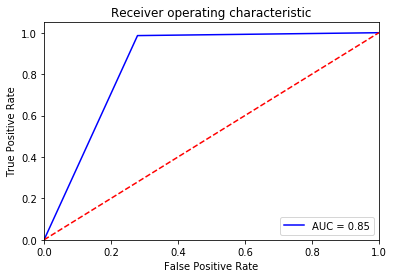

In [327]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()